# Project 3

## Part 0 - Business Case

* There is some speculation about whether or not males are less prone to go to the doctor when they ought to, compared to females. With the voice data, you could identify if it is a male or a female making the appointment. 
* 

## Part 1 - Data Exploration & Preparation

Populating the interactive namespace from numpy and matplotlib


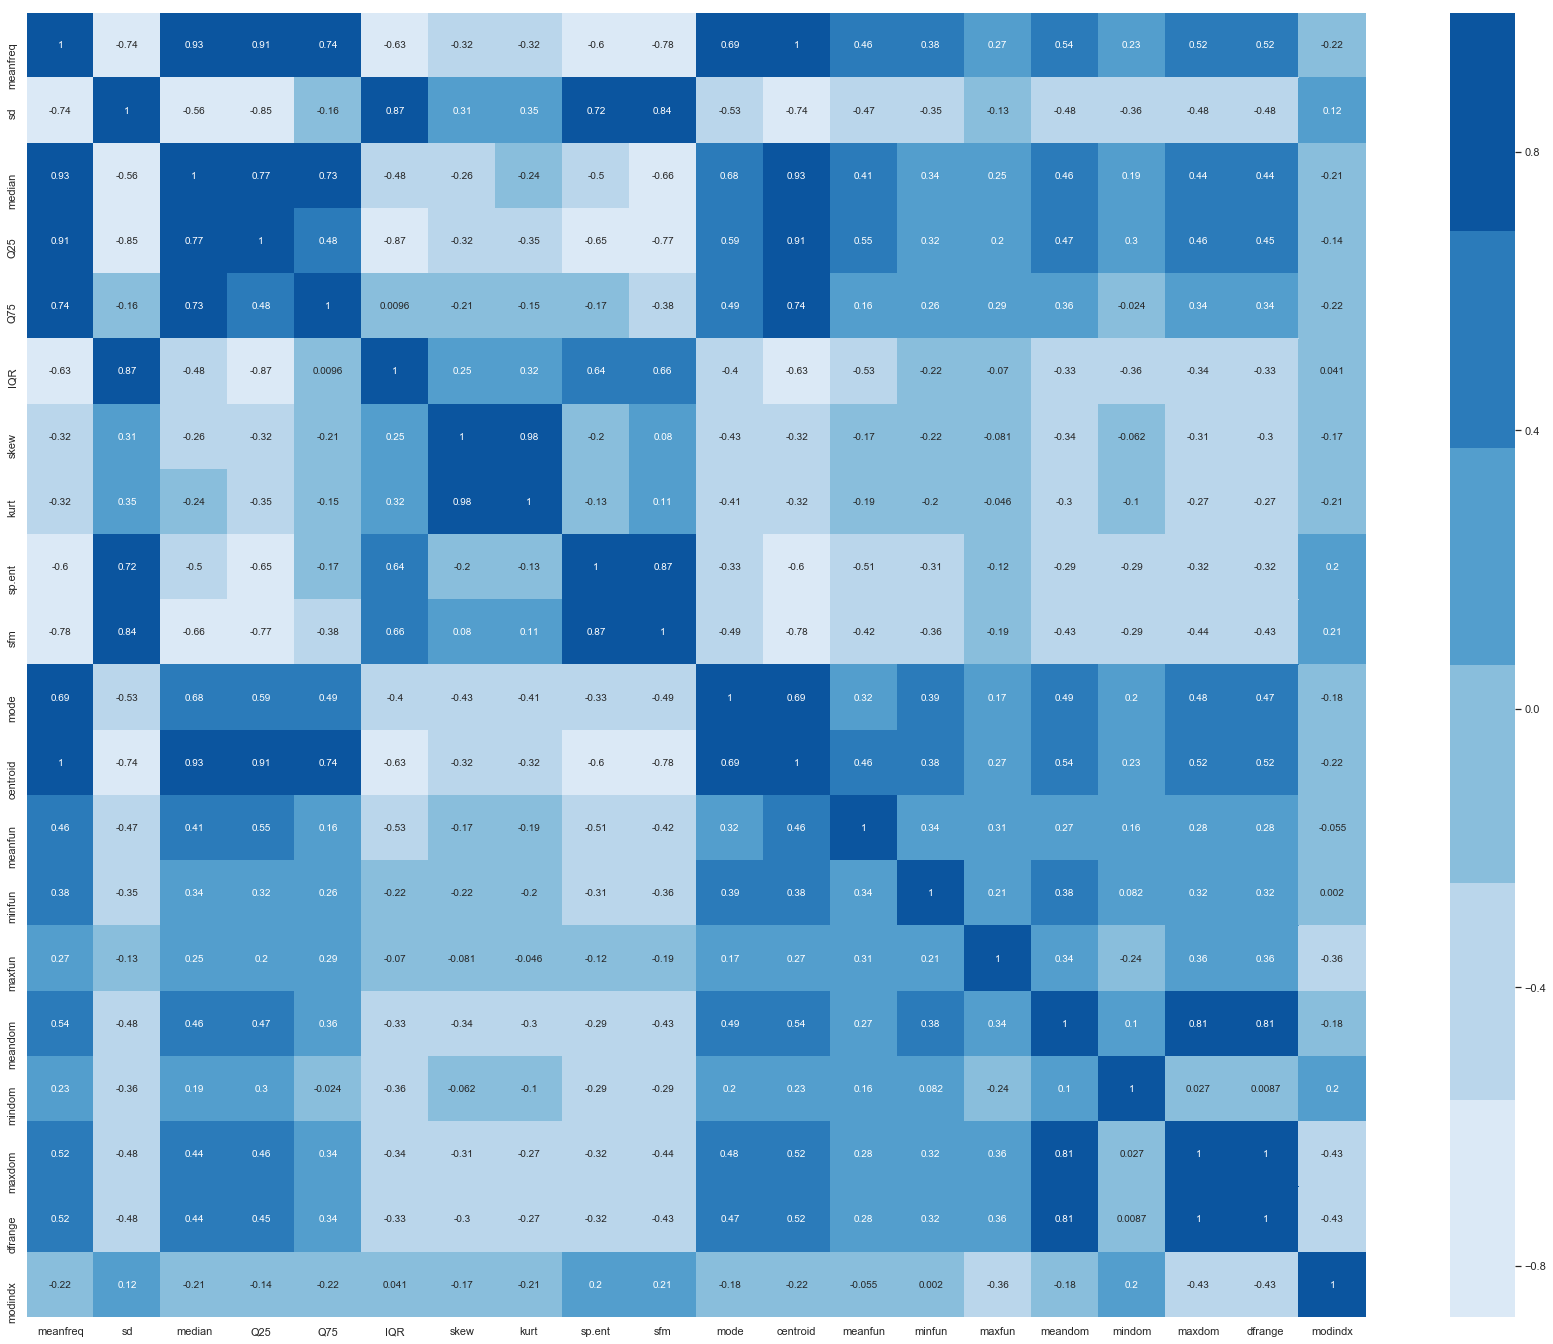

In [53]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


voice_csv = pd.read_csv("voice.csv")
x = voice_csv.iloc[:,0:-1]
y = LabelEncoder().fit_transform(voice_csv.iloc[:,-1])


plt.figure(figsize=(30, 24))
sns.heatmap(x.corr(), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.color_palette("Blues"),
            annot=True)

If we take a closer look at the correlation matrix plot shown above, we see that the six columns sd, IQR, skew, kurt, sp. ent and sfm are considerably more anti-correlated than the rest of the columns (since their values are negative). Due to these columns not contributing any meaningful values to the overall model, we decided to attempt leaving them out in hopes it would improve our accuracy score with the different classifiers.

In [56]:
from sklearn.neighbors import KNeighborsClassifier


x.drop(columns=["sd", "IQR", "skew", "kurt", "sp.ent", "sfm"])

,meanfreq,median,Q25,Q75,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.032027,0.015071,0.090193,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.040229,0.019414,0.092666,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.036718,0.008701,0.131908,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.158011,0.096582,0.207955,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.124656,0.078720,0.206045,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
5,0.132786,0.119090,0.067958,0.209592,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160
6,0.150762,0.160106,0.092899,0.205718,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992
7,0.160514,0.144337,0.110532,0.231962,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937
8,0.142239,0.138587,0.088206,0.208587,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272
9,0.134329,0.121451,0.075580,0.201957,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920
